# Nhập file excel

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving index.xlsx to index.xlsx


# Import thư viện

In [ ]:
!pip install pandas matplotlib

# Biểu đồ 1: Biểu đồ hiển thị xu hướng doanh thu theo thời gian

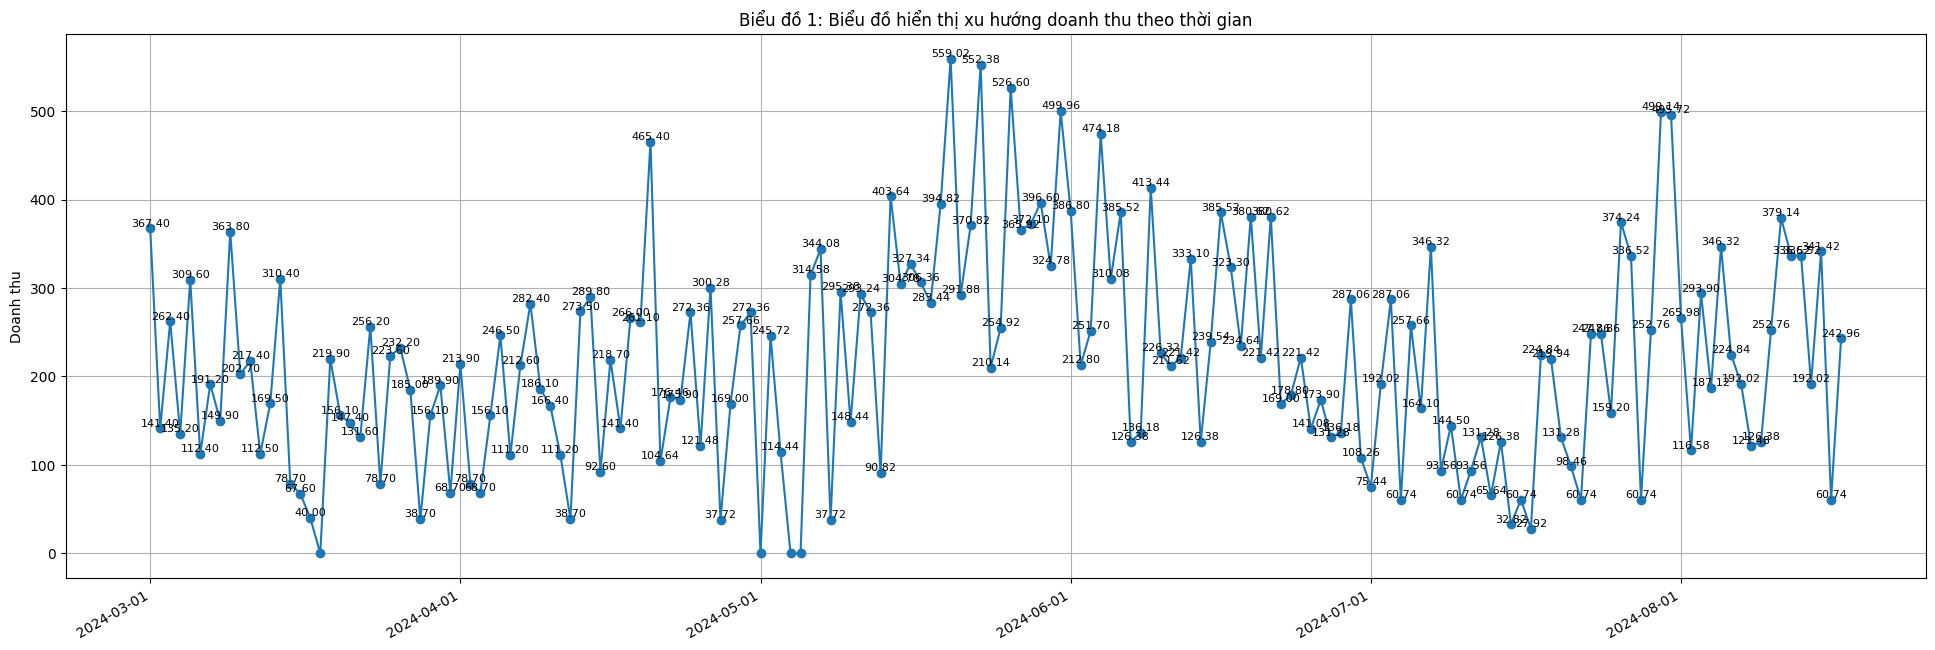

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Bước 1: Tải dữ liệu từ tệp Excel
file_path = './index.xlsx'
df = pd.read_excel(file_path)


# Bước 2: Chuyển đổi cột 'date' sang định dạng ngày giờ
df['date'] = pd.to_datetime(df['date'])

# Bước 3: Chuyển đổi cột 'money' sang kiểu numeric, xử lý lỗi bằng cách thay thế bằng 0
df['money'] = pd.to_numeric(df['money'], errors='coerce').fillna(0)

# Bước 4: Nhóm theo ngày và tính tổng số tiền cho mỗi ngày
df_grouped = df.groupby('date')['money'].sum().reset_index()

# Bước 5: Tạo phạm vi ngày bao gồm tất cả các ngày giữa ngày tối thiểu và ngày tối đa
all_dates = pd.date_range(start=df_grouped['date'].min(), end=df_grouped['date'].max())

# Bước 6: Lập chỉ mục lại DataFrame đã nhóm để bao gồm tất cả các ngày, điền ngày bị thiếu bằng 0
df_grouped = df_grouped.set_index('date').reindex(all_dates, fill_value=0).rename_axis('date').reset_index()

# Điều chỉnh kích thước biểu đồ
plt.figure(figsize=(24, 8))
plt.plot(df_grouped['date'], df_grouped['money'], marker='o')

# Định dạng trục x để hiển thị ngày tháng theo dạng YYYY-MM
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show labels at the start of each month

# Xoay nhãn trục x để dễ đọc hơn
plt.gcf().autofmt_xdate()

# Thêm nhãn dữ liệu phía trên mỗi điểm mà tiền không bằng 0
for i, row in df_grouped.iterrows():
    if row['money'] != 0:
        plt.text(row['date'], row['money'], f'{row["money"]:.2f}', ha='center', va='bottom', fontsize=8)

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ 1: Biểu đồ hiển thị xu hướng doanh thu theo thời gian')
plt.ylabel('Doanh thu')
plt.grid(True)

plt.savefig('Doanh_thu_theo_thoi_gian_bd1.jpg')

# Hiển thị biểu đồ
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Biểu đồ 2: Biểu đồ cột chồng phân tích doanh thu theo loại hình thanh toán

Ngày bắt đầu (YYYY-MM-DD): 2024-03-01
Cho đến ngày (YYYY-MM-DD): 2024-03-31


<ipython-input-8-a93ef2d7d296>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['money'] = pd.to_numeric(df_filtered['money'], errors='coerce').fillna(0)


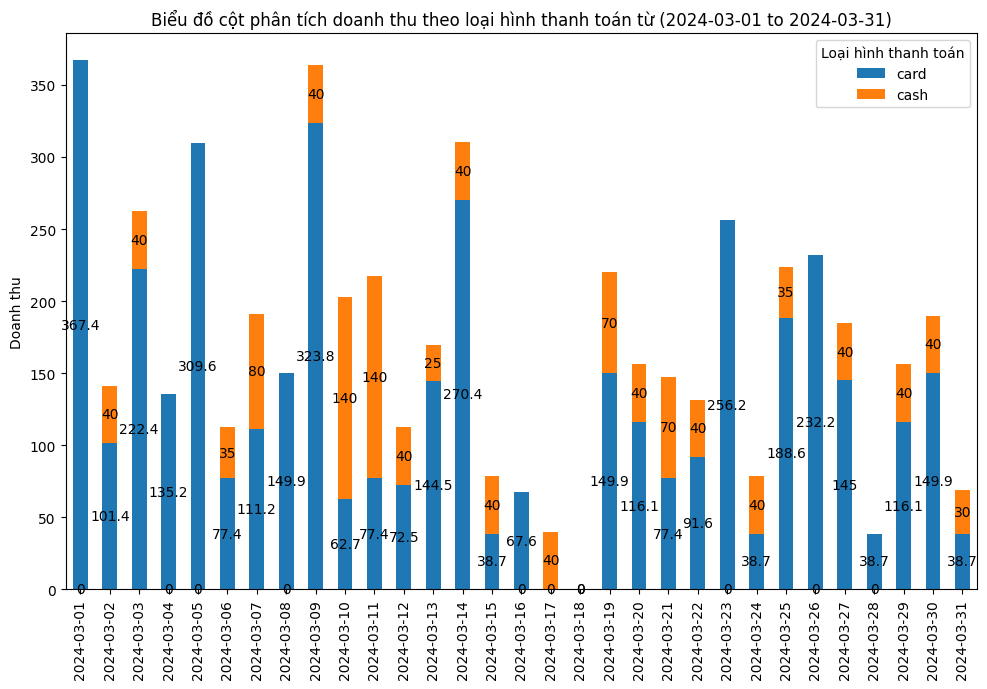

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Bước 1: Tải dữ liệu từ tệp Excel
file_path = './index.xlsx'
df = pd.read_excel(file_path)

# Bước 2: Chuyển đổi cột 'date' sang định dạng ngày giờ
df['date'] = pd.to_datetime(df['date'])

# Bước 3: Yêu cầu người dùng nhập ngày bắt đầu và ngày kết thúc
start_date = input("Ngày bắt đầu (YYYY-MM-DD): ")
end_date = input("Cho đến ngày (YYYY-MM-DD): ")

# Bước 4: Lọc khung dữ liệu để chỉ bao gồm các ngày trong phạm vi đã chỉ định
df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Bước 5: Chuyển đổi cột 'money' sang kiểu numeric, xử lý lỗi bằng cách thay thế bằng 0 (nếu cần)
df_filtered['money'] = pd.to_numeric(df_filtered['money'], errors='coerce').fillna(0)

# Bước 6: Nhóm theo 'date' và 'cash_type', sau đó cộng 'money'
df_grouped_filtered = df_filtered.groupby(['date', 'cash_type'])['money'].sum().unstack()
df_grouped_filtered.index = df_grouped_filtered.index.strftime('%Y-%m-%d')

# Bước 7: Vẽ biểu đồ cột chồng phân tích doanh thu theo loại hình thanh toán
ax = df_grouped_filtered.plot(kind='bar', stacked=True, figsize=(10, 7))

# Thêm tiêu đề và nhãn
plt.xlabel('')
plt.ylabel('Doanh thu')
plt.title(f'Biểu đồ cột phân tích doanh thu theo loại hình thanh toán từ ({start_date} to {end_date})')
plt.xticks(rotation=90)
plt.legend(title='Loại hình thanh toán')

# Thêm nhãn dữ liệu
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.savefig('Doanh_thu_theo_loai_hinh_thanh_toan_bd2.jpg')
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Biểu đồ 3: Biểu đồ tròn hiển thị tỷ lệ phần trăm doanh thu từ các loại sản phẩm.

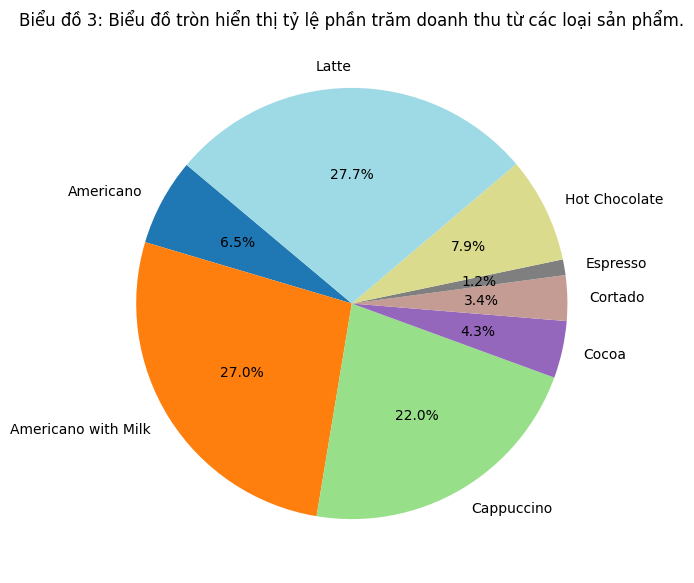

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Bước 1: Tải dữ liệu từ tệp Excel
file_path = './index.xlsx'
xls = pd.ExcelFile(file_path)

# Tải dữ liệu từ sheet mình cần phân tích
df = pd.read_excel(xls, sheet_name='index')

# Bước 2: Chuyển đổi cột 'money' sang kiểu numeric, xử lý lỗi bằng cách thay thế bằng 0
#         (nếu có datetime object trong cột 'money')
df['money'] = pd.to_numeric(df['money'], errors='coerce').fillna(0)

# Bước 3: Nhóm dữ liệu theo coffee_name và tính tổng tiền
coffee_sales = df.groupby('coffee_name')['money'].sum()

# Bước 4: Vẽ biểu đồ hình tròn
plt.figure(figsize=(10, 7))
coffee_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('Biểu đồ 3: Biểu đồ tròn hiển thị tỷ lệ phần trăm doanh thu từ các loại sản phẩm.')
plt.ylabel('')  # Ẩn nhãn y để rõ ràng hơn

plt.savefig('Doanh_thu_theo_loai_san_pham_bd3.jpg')
plt.show()

# Biểu đồ 4: Biểu đồ thanh ngang so sánh doanh thu của các loại sản phẩm.

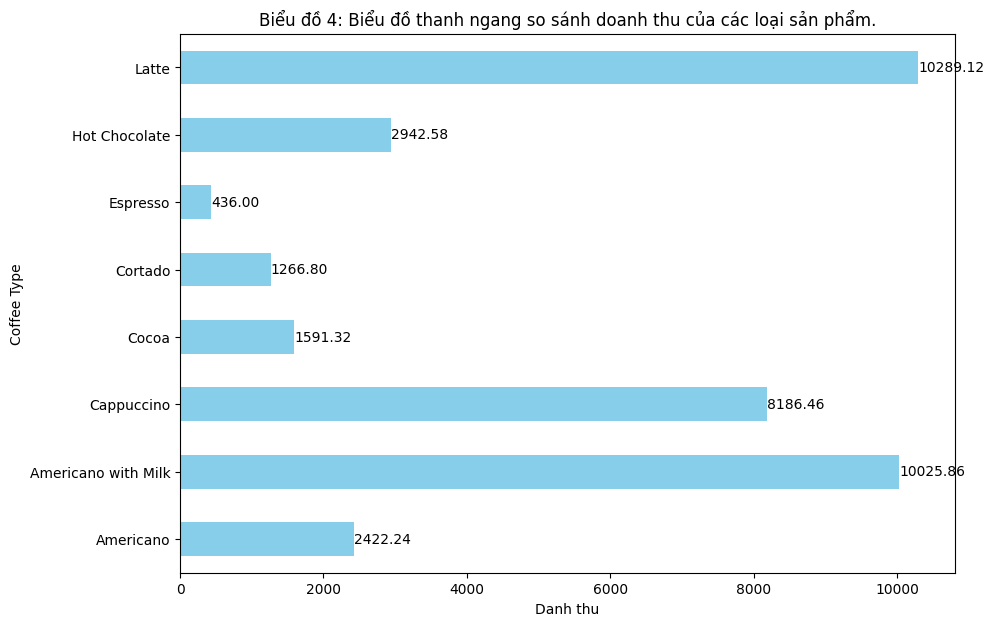

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Bước 1: Tải dữ liệu từ tệp Excel
file_path = 'index.xlsx'
xls = pd.ExcelFile(file_path)

# Tải dữ liệu từ sheet mình cần phân tích
df = pd.read_excel(xls, sheet_name='index')

# Bước 2: Chuyển đổi cột 'money' sang kiểu numeric, xử lý lỗi bằng cách thay thế bằng 0
#         (nếu có datetime object trong cột 'money')
df['money'] = pd.to_numeric(df['money'], errors='coerce').fillna(0)

# Bước 3: Nhóm dữ liệu theo coffee_name và tính tổng tiền
coffee_sales = df.groupby('coffee_name')['money'].sum()

# Bước 4: Vẽ biểu đồ thanh ngang với nhãn dữ liệu để so sánh doanh thu theo loại cà phê
plt.figure(figsize=(10, 7))
bars = coffee_sales.plot(kind='barh', color='skyblue')
plt.title('Biểu đồ 4: Biểu đồ thanh ngang so sánh doanh thu của các loại sản phẩm.')
plt.xlabel('Danh thu')
plt.ylabel('Coffee Type')

# Bước 5: Thêm nhãn dữ liệu vào mỗi thanh
for index, value in enumerate(coffee_sales):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.savefig('So_sanh_doanh_thu_cac_loai_san_pham_bd4.jpg')

plt.show()

# Biểu đồ 5: Biểu đồ cột phân tích doanh thu theo từng giờ trong ngày.

Ngày bắt đầu (YYYY-MM-DD): 2024-03-01
Cho đến ngày (YYYY-MM-DD): 2024-03-15


<ipython-input-12-c9679d7f3599>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['datetime'].dt.date
<ipython-input-12-c9679d7f3599>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hour'] = filtered_df['datetime'].dt.hour
<ipython-input-12-c9679d7f3599>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

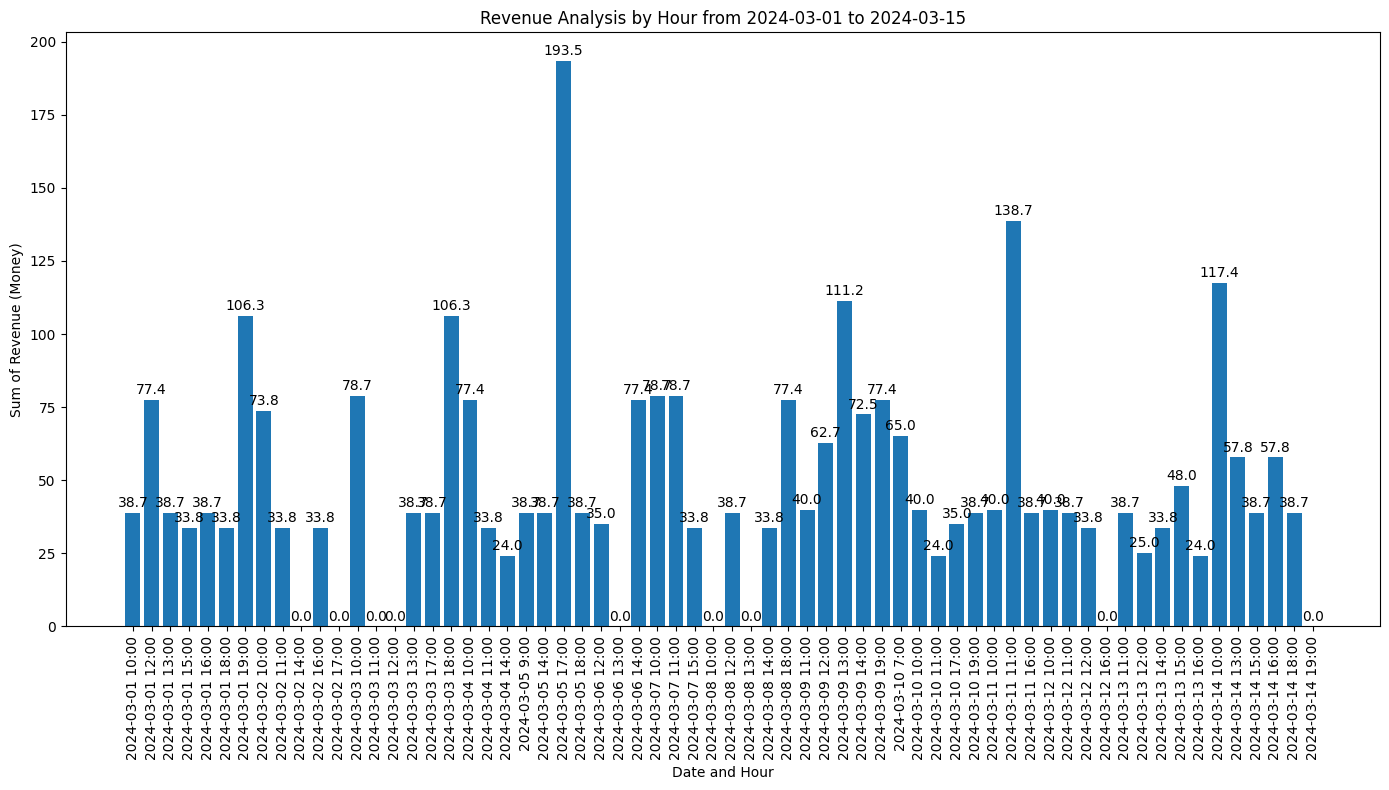

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = './index.xlsx'
df = pd.read_excel(file_path)

# Ensure the 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Prompt user for the date range
start_date = input("Ngày bắt đầu (YYYY-MM-DD): ")
end_date = input("Cho đến ngày (YYYY-MM-DD): ")

# Filter the dataframe based on the selected date range
filtered_df = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Create separate columns for date and hour
filtered_df['date'] = filtered_df['datetime'].dt.date
filtered_df['hour'] = filtered_df['datetime'].dt.hour

# Convert 'money' column to numeric type
filtered_df['money'] = pd.to_numeric(filtered_df['money'], errors='coerce')

# Group by date and hour, then sum the 'money' column
grouped = filtered_df.groupby(['date', 'hour'])['money'].sum().reset_index()

# Sort the grouped data by date and then by hour in ascending order
grouped = grouped.sort_values(by=['date', 'hour'])

# Create a new column combining the date and hour for plotting
grouped['date_hour'] = grouped['date'].astype(str) + ' ' + grouped['hour'].astype(str) + ':00'

# Plot the data
plt.figure(figsize=(14, 8))
bars = plt.bar(grouped['date_hour'], grouped['money'])

# Set plot title and labels
plt.title(f'Revenue Analysis by Hour from {start_date} to {end_date}')
plt.xlabel('Date and Hour')
plt.ylabel('Sum of Revenue (Money)')
plt.xticks(rotation=90)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()

plt.savefig('Doanh_thu_theo_gio_bd5.jpg')
plt.show()